## Day 40 - DIY SOLUTION
**Q1. Problem Statement: Naïve Bayes Classification**<br>
Write a Python program that reads the mobile price.csv (provided on LMS).The following are the given tasks that needs to be taken into consideration while building Naïve Bayes model.
1. Load the mobile price.csv dataset into a DataFrame
2. Check the data type of each column and change it according to their data
3. Find missing values and treat them if you found any
4. Plot bar graph for target variable and their categories with help of seaborn
and if data is not balanced then treat them using SMOT.
5. Extract independent variables (Xs) and dependent variables (Ys) into separate
data objects
6. Split data into train and test DataFrame and set test size as 0.2
7. Build Gaussian and Bernoulli models, compare their accuracy


**Dataset Description**

battery_power
Total energy a battery can store in one time measured in mAh

blue
Has bluetooth or not

clock_speed
speed at which microprocessor executes instructions

dual_sim
Has dual sim support or not

fc
Front Camera mega pixels

four_g
Has 4G or not

int_memory
Internal Memory in Gigabytes

m_dep
Mobile Depth in cm

mobile_wt
Weight of mobile phone

n_cores
Number of cores of processor

pc
Primary Camera mega pixels

px_height
Pixel Resolution Height

px_width
Pixel Resolution Width

ram
Random Access Memory in Mega Bytes

sc_h
Screen Height of mobile in cm

sc_w
Screen Width of mobile in cm

talk_time
longest time that a single battery charge will last when you are

three_g
Has 3G or not

touch_screen
Has touch screen or not

wifi
Has wifi or not

price_range
This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

**Step-1:** Import Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

**Step-2:**  Loading given data set into dataframe.

In [2]:
df=pd.read_csv('/content/mobile price.csv') # upload the dataset in google collab files section
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Step-3:** Checking datatypes of columns.

In [3]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

**Step-4:** Finding missing value.

In [4]:
#null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Step-5:** Targeting price_range for data distribution.

In [5]:
#target variable  distribution
Target_ratio = df['price_range'].value_counts()/len(df)
print(Target_ratio)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64


**Step-6:** Bar plot for target variable .

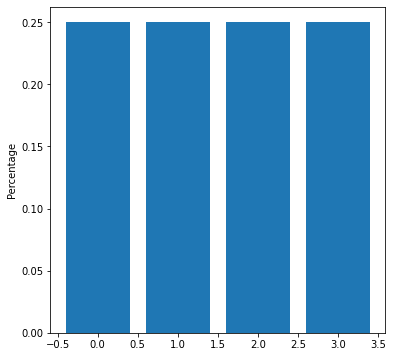

In [6]:
## Checking for data unbalance
plt.figure(figsize = (6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.show()
# our all class are equal and in balance form. 

**Step-7:** Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

In [7]:
#training and testing 
x = df.drop("price_range",axis=1)
y = df.price_range

**Step-8:** Split data into train and test DataFrame and set test size as 0.2.

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)

**Step-9:** Building Gaussian model

In [9]:
#model building
#gausian
gaussian_nb=GaussianNB()
gaussian_nb.fit(x_train,y_train)

GaussianNB()

**Step-10:** Build Bernoulli model 

In [10]:
#model building
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(x_train,y_train)

BernoulliNB()

**Step-11:** Evaluate both model on test data.

In [11]:
#gaussian accuracy
pred=gaussian_nb.predict(x_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score for gaussian: ',acc_gnb)

Accuracy Score for gaussian:  0.835


In [12]:
#barnulli accuracy
pred=bernoulli_nb.predict(x_test)
acc_bnb=accuracy_score(y_test,pred)
print('Accuracy Score for bernoulli: ',acc_bnb)

Accuracy Score for bernoulli:  0.255


**Step-12:** Bar plot for each model score.

<BarContainer object of 2 artists>

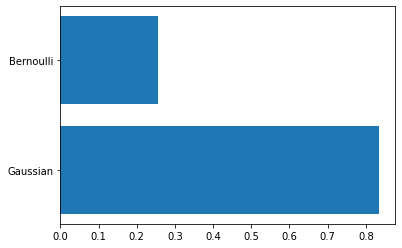

In [13]:
plt.barh(['Gaussian','Bernoulli'],[acc_gnb,acc_bnb])